## This is a data frame with 400 observations on the following variables:

### The goal of this exercise is to analyze a dataset consisting of information from 400 credit card holders and to comprehend which factors influence the Credit Card Balance of a cardholder and to predict the average Balance of a given individual. 


#### ID - Identification
#### Income - Income in 10,0000 (Dollars)
#### Limit - Credit limit
#### Rating - Credit rating
#### Age - Age in year
#### Education - number of years of education
#### Gender - Male or Female
#### Student - Yes or No
#### Married - Yes or No
#### Ethnicity - African American, Asian or Caucasian
#### Balance - Average credit card balance in Dollars

#### Objective: The aim is to determine which factors influence the credit card Balance of any given individual.

In [1]:
#Importing required libraries

import numpy as np                 #numpy stands for Numerical Python, it is used for numerical operations
import pandas as pd                #pandas stands for Python Data Analysis Library, it is used for data manipulation
import matplotlib.pyplot as plt    #matplot library for plotting
import seaborn as sns              #seaborn library for Plotting
import warnings                    #to ignore warnings
warnings.filterwarnings('ignore')  

In [2]:
df = pd.read_csv("Credit.csv")     #imported the data, here only the name of file is used as 
                                   #it is in the same directory as the program

In [3]:
df.head()                          #head() function prints the top 5 rows

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
#As we can see the "Unnamed: 0 does not give any information about data, hence we are removing it from our dataframe"
df.drop('Unnamed: 0', inplace = True, axis =1)

# EDA: Exploratory Data Analysis

<AxesSubplot:>

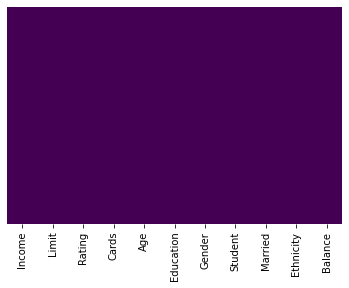

In [5]:
sns.heatmap(df.isna(),yticklabels =False, cbar =False, cmap= 'viridis')  
#to visualize the missing values.

In [6]:
df.isna().sum()   # prints the null values in data

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [7]:
df.shape          # checking the shape of data (rows =400, col=12)

(400, 11)

In [8]:
df.info()  # prints the metadata of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [9]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


## Describing the target of inference

### One of the first steps of this Exploratory Data Analysis is to examine the target of inference ( Balance ) in isolation

<AxesSubplot:xlabel='Balance', ylabel='Density'>

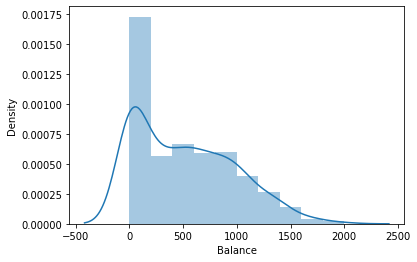

In [10]:
#Plotting a Histogram, to get an idea about our data concentration. 

sns.distplot(df.Balance)

It can be noticed that a large portion of the sample consists of Zero Balance Cards.
This is an important distinction because, if the average credit card Balance for a given individual is zero, we conclude that the person does not make use of that credit card.

As a credit card company, we may be interested in knowing the average balance across our frequent users (for instance, to identify those at risk of default), and the zero Balances may skew our results.

In [11]:
df[df.Balance==0]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
11,15.045,1311,138,3,64,16,Male,No,No,Caucasian,0
15,20.089,2525,200,3,57,15,Female,No,Yes,African American,0
16,53.598,3714,286,3,73,17,Female,No,Yes,African American,0
22,20.103,2631,213,3,61,10,Male,No,Yes,African American,0
24,10.742,1757,156,3,57,15,Female,No,No,Caucasian,0
...,...,...,...,...,...,...,...,...,...,...,...
384,20.088,1870,180,3,76,16,Male,No,No,African American,0
387,16.529,1357,126,3,62,9,Male,No,No,Asian,0
392,25.974,2308,196,2,24,10,Male,No,No,Asian,0
393,17.316,1335,138,2,65,13,Male,No,No,African American,0


<AxesSubplot:xlabel='Balance', ylabel='Density'>

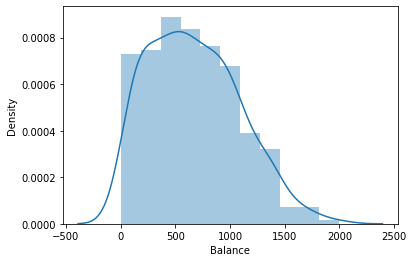

In [12]:
#Again plotting a histogram to analyse a pattern. 
active_credit_df = df.loc[df.Balance>0] 
sns.distplot(active_credit_df.Balance)

Without the zero Balances, the curve resembles a normal distribution.

<AxesSubplot:xlabel='Ethnicity', ylabel='Balance'>

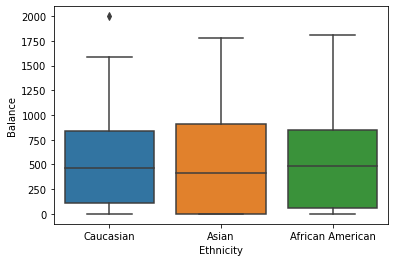

In [13]:
sns.boxplot(x='Ethnicity',y ='Balance',data = df)

<AxesSubplot:xlabel='Student', ylabel='Balance'>

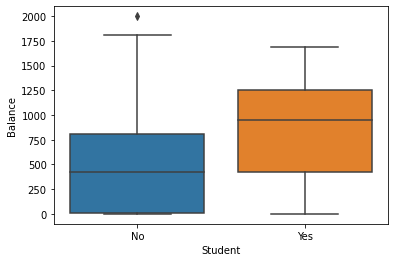

In [14]:
sns.boxplot(x='Student', y='Balance', data = df)

Students display on average higher credit card Balances. We infer that Students have a higher need for financing due to student loans and have generally lower personal income. Moreover, we could presume that students tend to have less control over their finances and their financial flexibility may be lower.

<AxesSubplot:xlabel='Married', ylabel='Balance'>

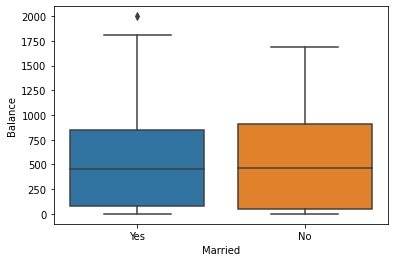

In [15]:
sns.boxplot(x='Married', y='Balance', data = df)

<AxesSubplot:xlabel='Education', ylabel='Density'>

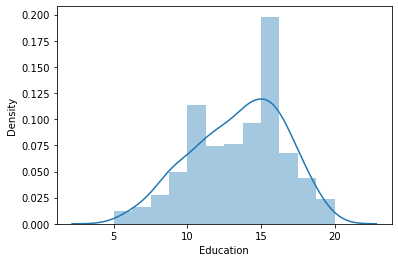

In [16]:
sns.distplot(df.Education)

<AxesSubplot:xlabel='Balance', ylabel='Limit'>

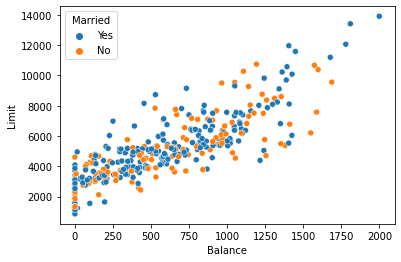

In [17]:
sns.scatterplot(x =df.Balance,y=df.Limit,hue = df.Married)

<AxesSubplot:xlabel='Balance', ylabel='Rating'>

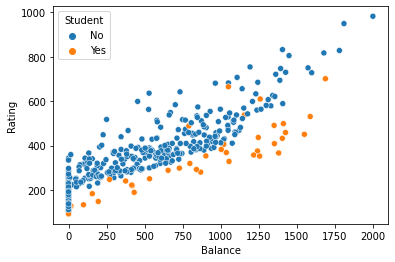

In [18]:
sns.scatterplot(x =df.Balance,y=df.Rating,hue = df.Student)

## Using Encoder
### To convert categorical features into continuous features. This step is necessary for different statistical tools, transformation and model.

In [19]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])  

In [20]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,0,0,1,2,333
1,106.025,6645,483,3,82,15,1,1,1,1,903
2,104.593,7075,514,4,71,11,0,0,0,1,580
3,148.924,9504,681,3,36,11,1,0,0,1,964
4,55.882,4897,357,2,68,16,0,0,1,2,331


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(df)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const         74.953032
Income        10.723751
Limit        253.809688
Rating       237.636870
Cards          1.508644
Age            1.060571
Education      1.020678
Gender         1.008132
Student        2.754676
Married        1.033965
Ethnicity      1.008333
Balance       22.214311
dtype: float64

### A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
### Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables.
### A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.
### As we can see Limit and Rating have high Variance Inflation factor, we can drop one of them from our features. But for now let us do some more analysis on the features.

# Pairwise correlations

A correlation matrix will be created in order to visualize the relationships among the numerical predictors and the target of inference.

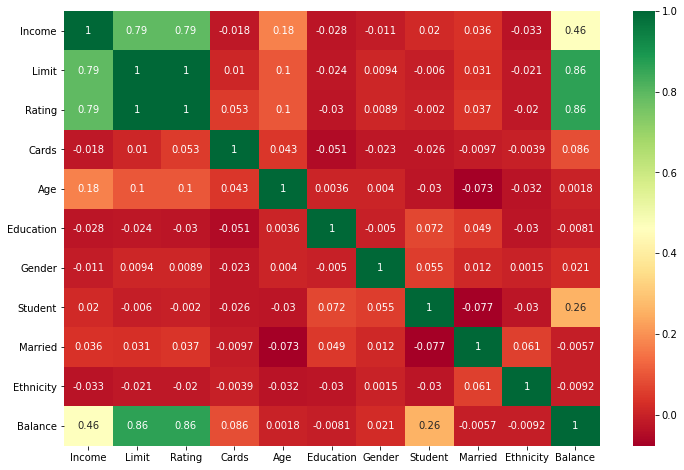

In [22]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='Limit', ylabel='Rating'>

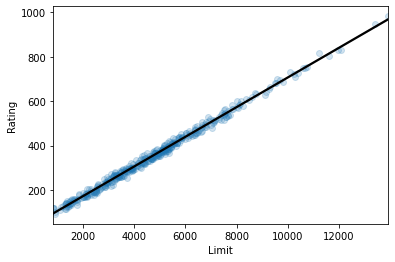

In [23]:
sns.regplot(x='Limit',
           y='Rating',
           data=df,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'black'})

From correlation coefficients we can see that Features like Income, LIMIT, Rating, Cards, Gender, Student have comparatively high correlation coefficients.

Further more we can see that LIMIT and RATING have correlation coefficient as 1. We can drop one of them to remove the multi-collinearity in our features.

# Preparing Data for modelling

In [24]:
df = df.loc[(df['Balance']!=0)]

In [25]:
X= df.drop(['Balance','Limit','Age','Education','Gender','Ethnicity','Married'], axis =1)
y= df['Balance']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=20)

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from pickle import dump

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from pickle import dump

def Preprocessing_step(df,flag):

    scalar_feature= StandardScaler() 
    scalar_target = StandardScaler() 
  
    scaled_data = scalar_feature.fit_transform(df)
    df = pd.DataFrame(data=scaled_data, columns=df.columns)
    if flag =='train':
        dump(scalar_feature, open('scaler_feature.pkl', 'wb'))
        
    
    return df
   


In [30]:
X_train = Preprocessing_step(X_train,'train')
X_train

,Income,Rating,Cards,Student
0,-0.921527,-0.489954,-0.648492,-0.4159
1,-0.316356,0.422478,-1.328312,-0.4159
2,-0.388894,0.379028,0.031328,-0.4159
3,-0.780045,0.226957,0.711148,-0.4159
4,0.982984,0.016952,2.070788,-0.4159
...,...,...,...,...
212,-0.905203,-0.345123,0.711148,-0.4159
213,0.121956,0.248681,0.711148,-0.4159
214,-0.874096,-0.091670,0.031328,-0.4159
215,2.476102,3.022183,2.750608,-0.4159


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)

LinearRegression()

In [34]:
print('Training accuracy=',lm.score(X_train,y_train)*100)

Training accuracy= 98.27758091146812


In [35]:
X_test = Preprocessing_step(X_test,'test')

In [36]:
pred = lm.predict(X_test)

In [37]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Prediction accuracy =',metrics.explained_variance_score(y_test, pred)*100)

Prediction accuracy = 95.86360299898877


In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 64.81419590455181
RMSE: 79.76093368144386


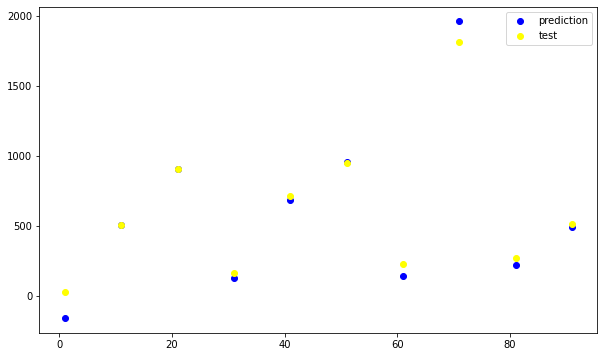

In [39]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),pred[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),y_test[0:100:10],color='yellow')

plt.legend(['prediction','test'])

In [40]:
import pickle

In [41]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(lm, open(filename, 'wb'))

In [42]:
cdf = pd.DataFrame(lm.coef_.reshape(-1,1),X_train.columns,columns=['coeff'])
cdf

,coeff
Income,-370.991402
Rating,667.594793
Cards,3.784910
Student,171.337466


In [43]:
dummy_set = df.sample(n = 20, replace = False)
dummy_set

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
349,48.577,5145,389,3,71,13,1,0,1,1,503
214,34.909,5289,410,2,62,16,1,0,1,2,681
100,21.153,3736,256,1,41,11,0,0,0,2,298
12,80.616,5308,394,1,57,7,1,0,1,1,204
6,20.996,3388,259,2,37,12,1,0,0,0,203
246,19.588,3211,265,4,59,14,1,0,0,1,199
165,25.383,4527,367,4,46,11,0,0,1,2,570
327,49.166,6662,508,3,68,14,1,0,0,1,984
5,80.180,8047,569,4,77,10,0,0,0,2,1151
209,151.947,9156,642,2,91,11,1,0,1,0,732


In [44]:
X1 = dummy_set.drop(['Balance','Limit','Age','Education','Gender','Ethnicity','Married'],axis =1)
y1= dummy_set['Balance']

In [45]:
encoder = preprocessing.LabelEncoder()

X1= X1.apply(encoder.fit_transform)
scalar = pickle.load(open('scaler_feature.pkl', 'rb'))
scalar.fit(X1) 
scaled_data = scalar.transform(X1)
    
X1 = pd.DataFrame(data=scaled_data, columns=X1.columns)

X1.head() 

,Income,Rating,Cards,Student
0,0.433555,-0.086711,0.130189,-0.420084
1,-0.433555,0.260133,-0.737737,-0.420084
2,-0.953821,-1.647509,-1.605663,-0.420084
3,1.300665,0.086711,-1.605663,-0.420084
4,-1.127243,-1.474087,-0.737737,-0.420084


In [46]:
import pickle
filename = 'finalized_model.sav'
lm = pickle.load(open(filename, 'rb'))

In [47]:
pred = lm.predict(X1)
pred

array([ 373.92649637,  923.8830576 , -159.91958005,  161.44172835,
         23.47913112,  325.9384848 ,  711.80237936, 1120.01776852,
       1161.83982511, 1078.03119444,  -57.04447716, 1285.06738742,
        522.62605818,  853.37903394, 1329.21751416,  528.2391507 ,
        708.35283949,  -15.22242057, 1496.98354818,  910.81802288])

In [48]:
pred = pd.DataFrame(pred, columns =["predicted V"])
y_test = pd.Series(y1).reset_index().drop(['index'],axis=1)

In [49]:
pd.DataFrame(data=pd.concat((pred,y_test), axis =1))

,predicted V,Balance
0,373.926496,503
1,923.883058,681
2,-159.919580,298
3,161.441728,204
4,23.479131,203
5,325.938485,199
6,711.802379,570
7,1120.017769,984
8,1161.839825,1151
9,1078.031194,732
